# **Multiclass classificaiton** ( Images ) ( 28*28 each )
* 60,000 Training data
* 10,000 Testing data
* Predicit the piece of clothing out of 10 different labels



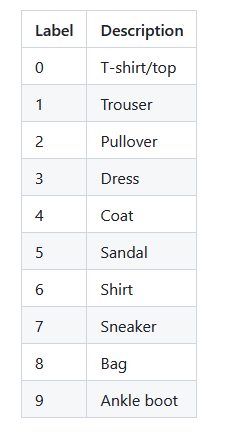

In [ ]:
# Create a confusion matrix to use it later

import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix cm
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix
  n_classes = cm.shape[0]

  # Lets pettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm , cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  #Label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )
  # set axis x labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # set Thresholds
  threshold = (cm.max() + cm.min()) / 2.
  # Put text in each of the cells
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Create a random image plots to see the percentage of the prediction
def plot_random_image(model, images, true_labels, classes):
  # picks a random image plots it and label it with a predition and true label
  # Set up random integer
  i = random.randint(0, len(images))

  # Create preditions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on the prediction
  if pred_label == true_label :
    color ="green"
  else:
    color = "red"
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [ ]:
# 1. Import the libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import numpy as np

# The data has already been sorted for us into training and test sets
(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Check the len of the test and train
len(train_data), len(test_data), len(train_labels), len(test_labels)

(60000, 10000, 60000, 10000)

In [ ]:
# check the shape
train_data[0].shape

(28, 28)

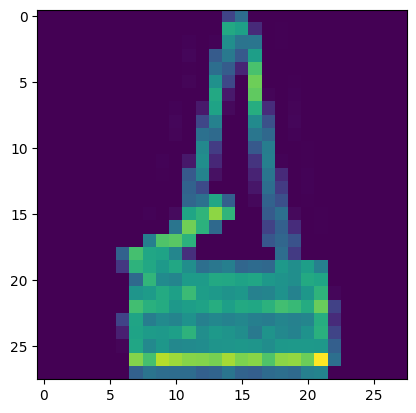

In [ ]:
# Visulalize our data
import random
import matplotlib.pyplot as plt
plt.imshow(train_data[random.randint(0, 60000)])

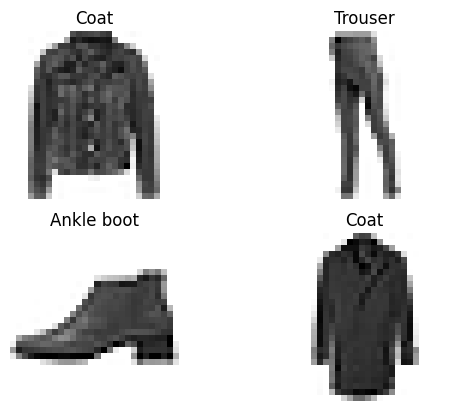

In [ ]:
# Plot multiple images to better visualize the data we are working with
# Create a small list so we can index onto our training labels so they are human readable
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# Lets view our data
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

## We can see that the range of the numbers inside the training data is between **(0, 255)** so lets normalize the numbers to get better results

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Building the model

In [ ]:
tf.random.set_seed(42)
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # to avoid the shape error
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # "Sparse" is for integers labels not one hot encoded
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# 4. Fit the model
history = model.fit(train_data_norm, train_labels, epochs=10,
                                   validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4970 - accuracy: 0.8209 - val_loss: 0.4316 - val_accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3692 - accuracy: 0.8648 - val_loss: 0.4291 - val_accuracy: 0.8448
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8756 - val_loss: 0.3883 - val_accuracy: 0.8611
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3112 - accuracy: 0.8854 - val_loss: 0.3624 - val_accuracy: 0.8686
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2945 - accuracy: 0.8896 - val_loss: 0.3558 - val_accuracy: 0.8673
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2798 - accuracy: 0.8939 - val_loss: 0.3630 - val_accuracy: 0.8659
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2691 - accuracy: 0.8990 - val_loss: 0.3823 - val_accurac

In [ ]:
# Evaluate our data
model.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.3357 - accuracy: 0.8840


[0.3356904983520508, 0.8840000033378601]

<Axes: title={'center': 'normalized data'}>

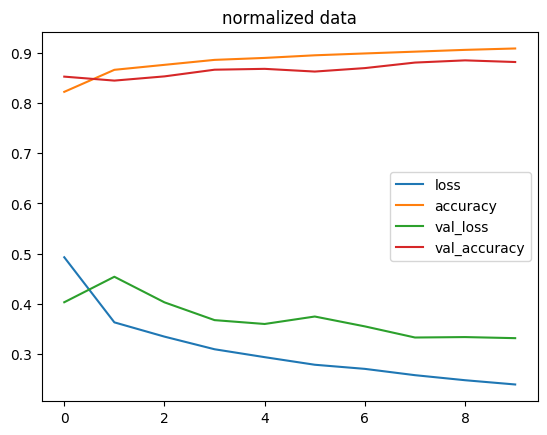

In [ ]:
import pandas as pd

# Plot  normalized data loss curves
pd.DataFrame(history.history).plot(title="normalized data")

In [ ]:
# get the predicitons
y = model.predict(test_data_norm)

# convert the predictions into (0, 9)s
y_preds = y.argmax(axis=1) # to get the result (0, 9)
y_preds,test_labels

313/313 [==============================] - 1s 4ms/step


(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

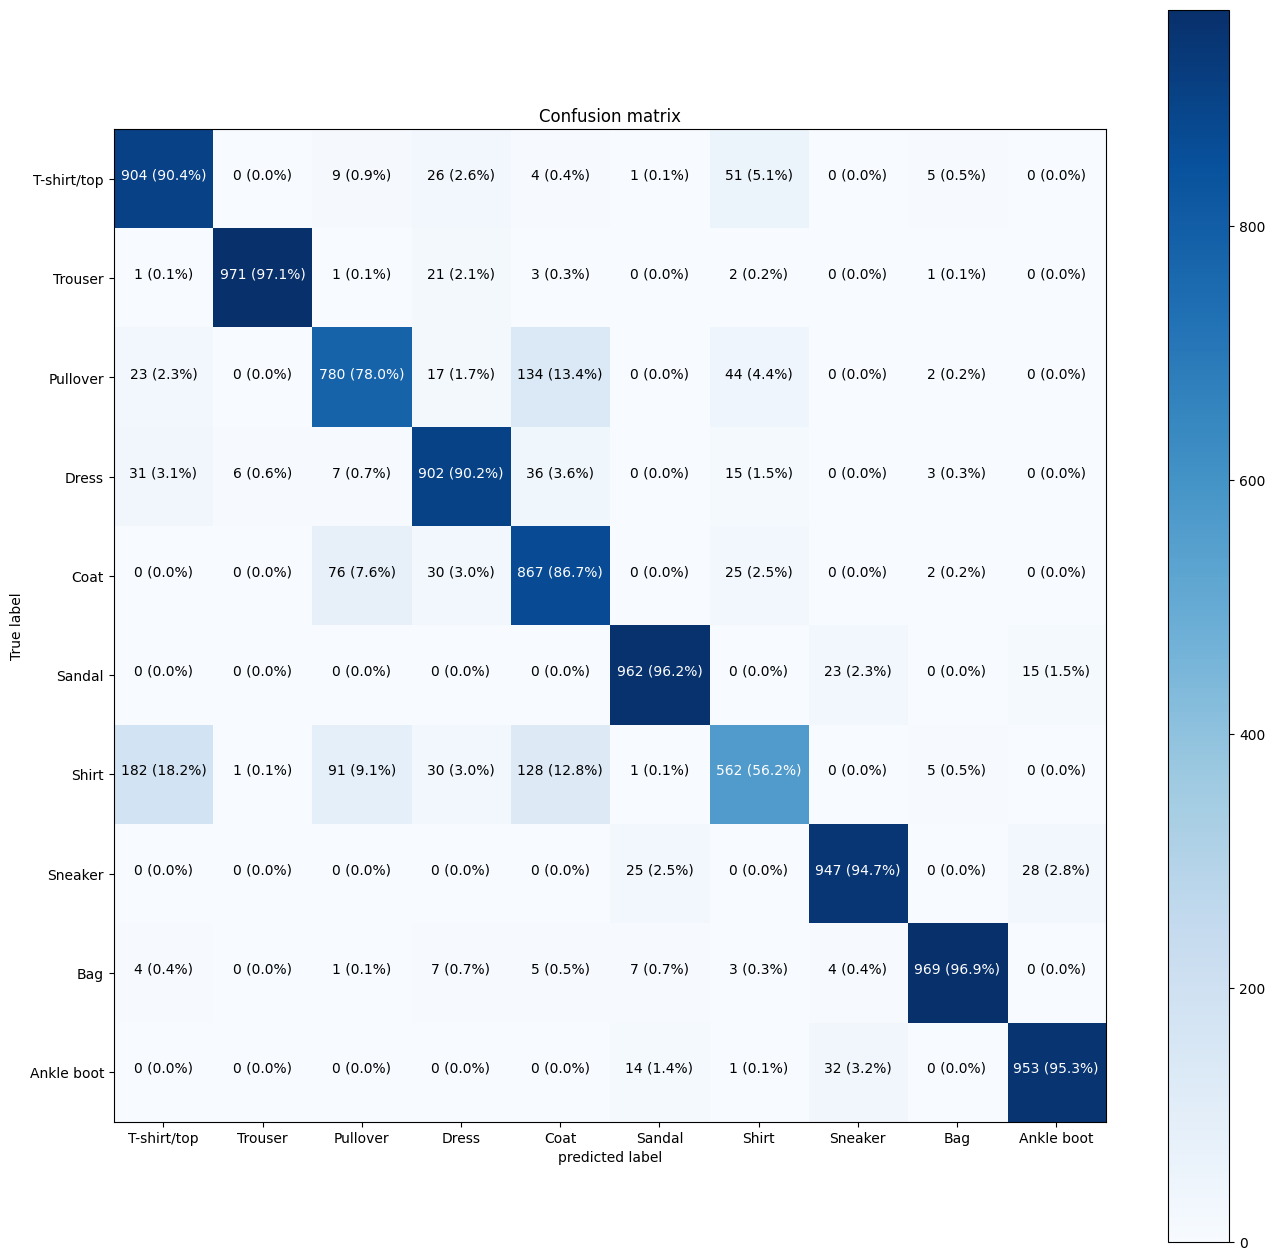

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(16, 16),
                      text_size=10)

1/1 [==============================] - 0s 21ms/step


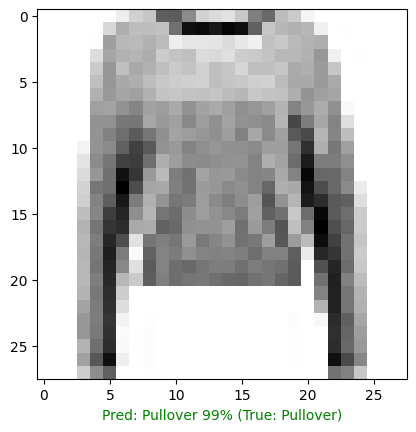

In [ ]:
plot_random_image(model=model,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)